In [101]:
#import required libraries
import numpy as np  # import numpy to calculate the array and matrix, datatype is ndarray
import pandas as pd  #我們會以 Pandas 的 CSV 讀取功能直接存取 Google Drive 裡面的.csv
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader   #for batch seperation

This is for google colab to import data

In [102]:
# print('loading data...')
# from google.colab import drive
# drive.mount('/content/drive')


In [103]:
# #import data
# data = pd.read_csv('/content/drive/MyDrive/CSV原始檔/ml-regression-2021/train-v3.csv')
# print(data)
# data.head(5).T  #使用.head()可以顯示5筆資料

# valid_data = pd.read_csv('/content/drive/MyDrive/CSV原始檔/ml-regression-2021/valid-v3.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/CSV原始檔/ml-regression-2021/test-v3.csv')

import data from local

In [104]:
#import data from local
data = pd.read_csv('data/machine-learning-2023-nycu-regression/ntut-ml-regression-2021/train-v3.csv')
#23-nycu-regression/ntut-ml-regression-2021/test-v3.csv')print(data)
data.head(5).T  #使用.head()可以顯示5筆資料
valid_data = pd.read_csv('data/machine-learning-2023-nycu-regression/ntut-ml-regression-2021/valid-v3.csv')
test_data = pd.read_csv('data/machine-learning-2023-nycu-regression/ntut-ml-regression-2021/test-v3.csv')

In [105]:
# get some information about our data-set
data.info()           #see datatype of the dataset, to see if any nonvalue
data.describe().transpose()
data_df = pd.DataFrame(data) # Convert data to a dataFrame, X_train variable is a NumPy ndarray, and ndarrays do not have a direct corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12967 entries, 0 to 12966
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12967 non-null  int64  
 1   price          12967 non-null  int64  
 2   sale_yr        12967 non-null  int64  
 3   sale_month     12967 non-null  int64  
 4   sale_day       12967 non-null  int64  
 5   bedrooms       12967 non-null  int64  
 6   bathrooms      12967 non-null  float64
 7   sqft_living    12967 non-null  int64  
 8   sqft_lot       12967 non-null  int64  
 9   floors         12967 non-null  int64  
 10  waterfront     12967 non-null  int64  
 11  view           12967 non-null  int64  
 12  condition      12967 non-null  int64  
 13  grade          12967 non-null  int64  
 14  sqft_above     12967 non-null  int64  
 15  sqft_basement  12967 non-null  int64  
 16  yr_built       12967 non-null  int64  
 17  yr_renovated   12967 non-null  int64  
 18  zipcod

Let’s plot couple of features to get a better feel of the data

C:\Users\SUNG YEN TING\AppData\Local\Temp\ipykernel_7504\60623909.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['price'])
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

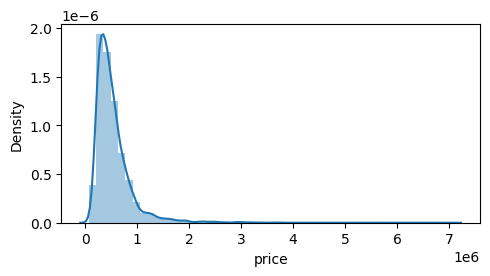

In [106]:
#visualizing house prices
fig = plt.figure(figsize=(5,5))   #繪製初始圖框
fig.add_subplot(2,1,2)         #在fig圖裡可以切塊(row,column,第幾個)
sns.distplot(data_df['price'])
plt.tight_layout()

c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

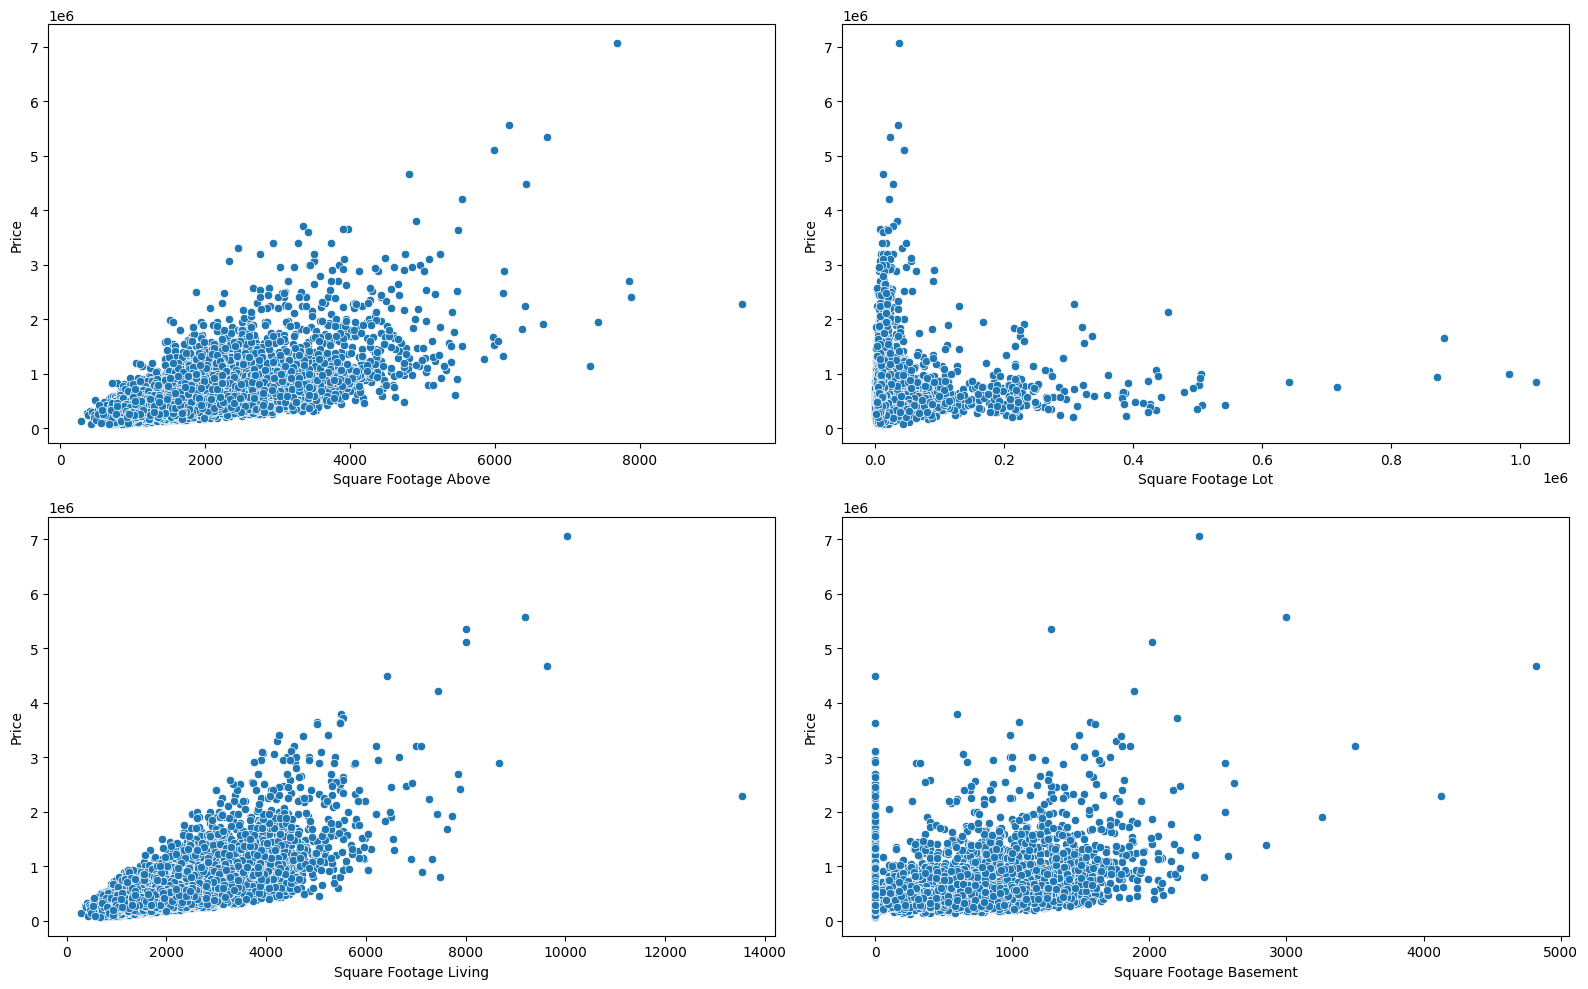

In [107]:
#visualizing square footage of (above, lot, living and basement)
fig = plt.figure(figsize=(16, 10))
# Scatter plot for square footage above vs price
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=data_df, x='sqft_above', y='price', ax=ax1)
ax1.set_xlabel('Square Footage Above')
ax1.set_ylabel('Price')

# Scatter plot for square footage lot vs price
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(data=data_df, x='sqft_lot', y='price', ax=ax2)
ax2.set_xlabel('Square Footage Lot')
ax2.set_ylabel('Price')

# Scatter plot for square footage living vs price
ax3 = fig.add_subplot(2, 2, 3)
sns.scatterplot(data=data_df, x='sqft_living', y='price', ax=ax3)
ax3.set_xlabel('Square Footage Living')
ax3.set_ylabel('Price')

# Scatter plot for square footage basement vs price
ax4 = fig.add_subplot(2, 2, 4)
sns.scatterplot(data=data_df, x='sqft_basement', y='price', ax=ax4)
ax4.set_xlabel('Square Footage Basement')
ax4.set_ylabel('Price')

plt.tight_layout()
plt.show()

c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

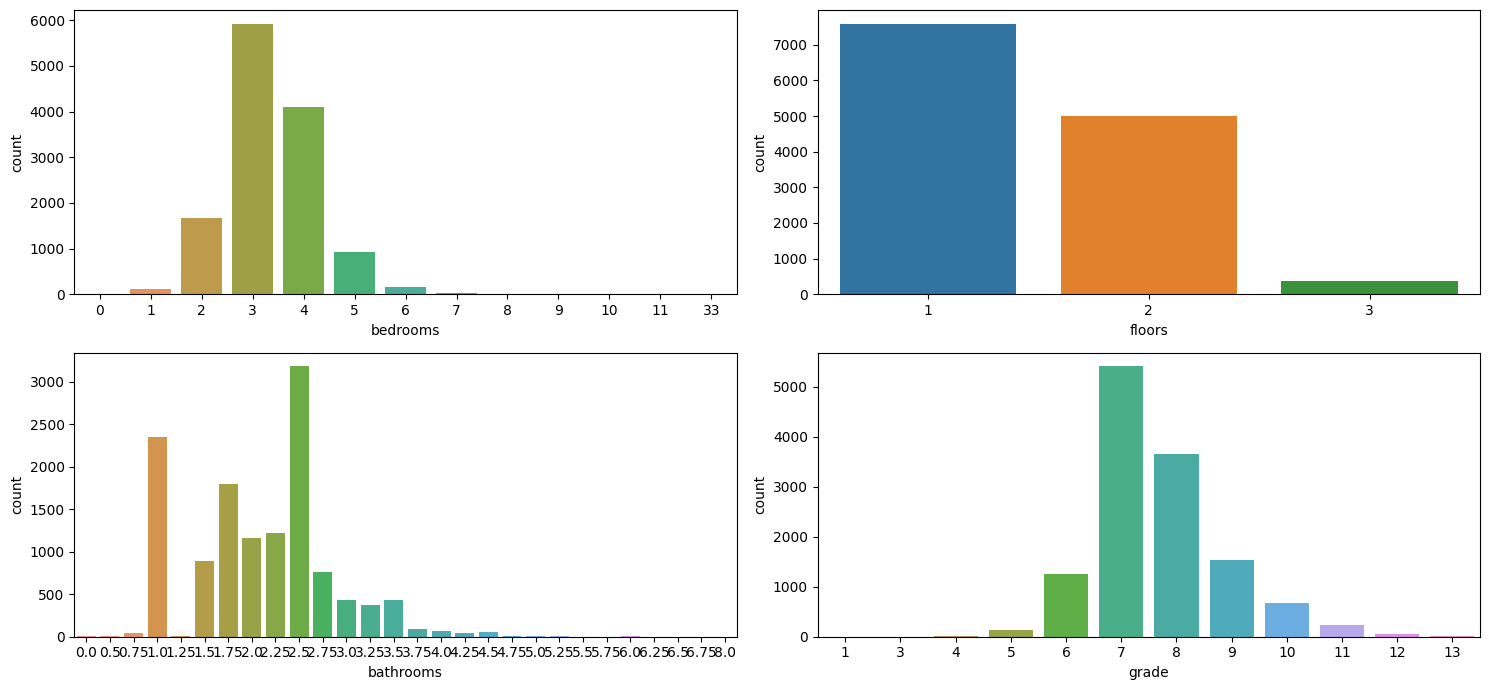

In [108]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data=data_df, x=data_df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(data=data_df, x=data_df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(data=data_df, x=data_df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(data=data_df, x=data_df['grade'])
plt.tight_layout()

I’m breaking the date columns down to years and months to see how is the house price is changing.

<Axes: xlabel='sale_yr'>

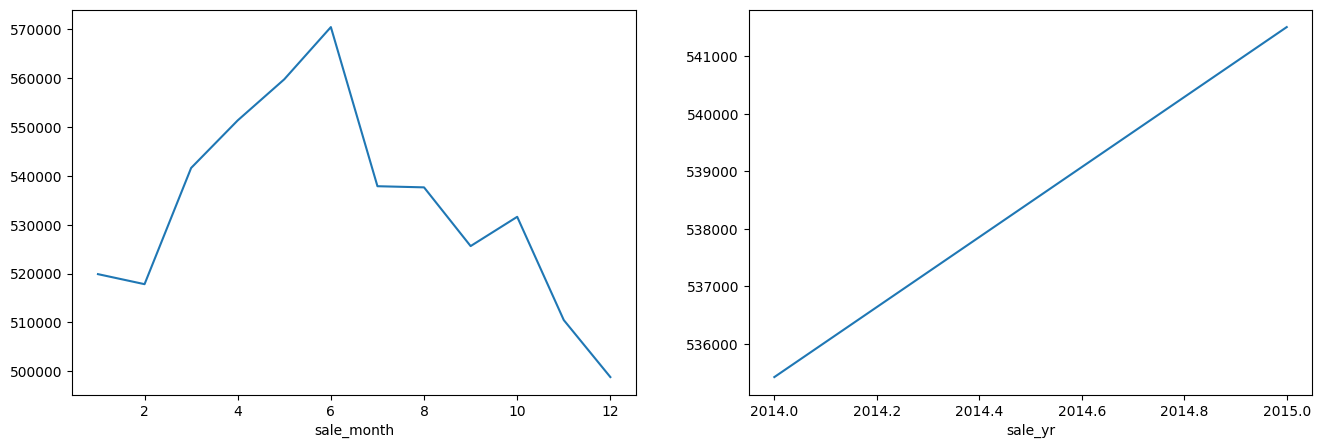

In [109]:
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
data.groupby('sale_month').mean()['price'].plot()
fig.add_subplot(1,2,2)
data.groupby('sale_yr').mean()['price'].plot()

In [110]:
# check if there are any Null values
data.isnull().sum()
#data.dtypes

id               0
price            0
sale_yr          0
sale_month       0
sale_day         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Dataset Preparation (Splitting and Scaling)**

Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.

Features (X): The columns that are inserted into our model will be used to make predictions.

Prediction (y): Target variable that will be predicted by the features

X_train:  [[ 2.00000e+05  2.01500e+03  3.00000e+00 ... -1.21986e+02  1.28000e+03
   6.53200e+03]
 [ 3.50000e+05  2.01400e+03  9.00000e+00 ... -1.22261e+02  2.50000e+03
   1.11000e+04]
 [ 2.54000e+05  2.01400e+03  1.20000e+01 ... -1.22376e+02  1.63000e+03
   7.88500e+03]
 ...
 [ 2.52500e+05  2.01500e+03  5.00000e+00 ... -1.22272e+02  1.11000e+03
   3.51500e+03]
 [ 4.97000e+05  2.01400e+03  6.00000e+00 ... -1.21999e+02  1.63000e+03
   3.34800e+03]
 [ 4.79000e+05  2.01400e+03  5.00000e+00 ... -1.22351e+02  1.51000e+03
   2.15100e+03]]
Y_train:  [200000 350000 254000 ... 252500 497000 479000]


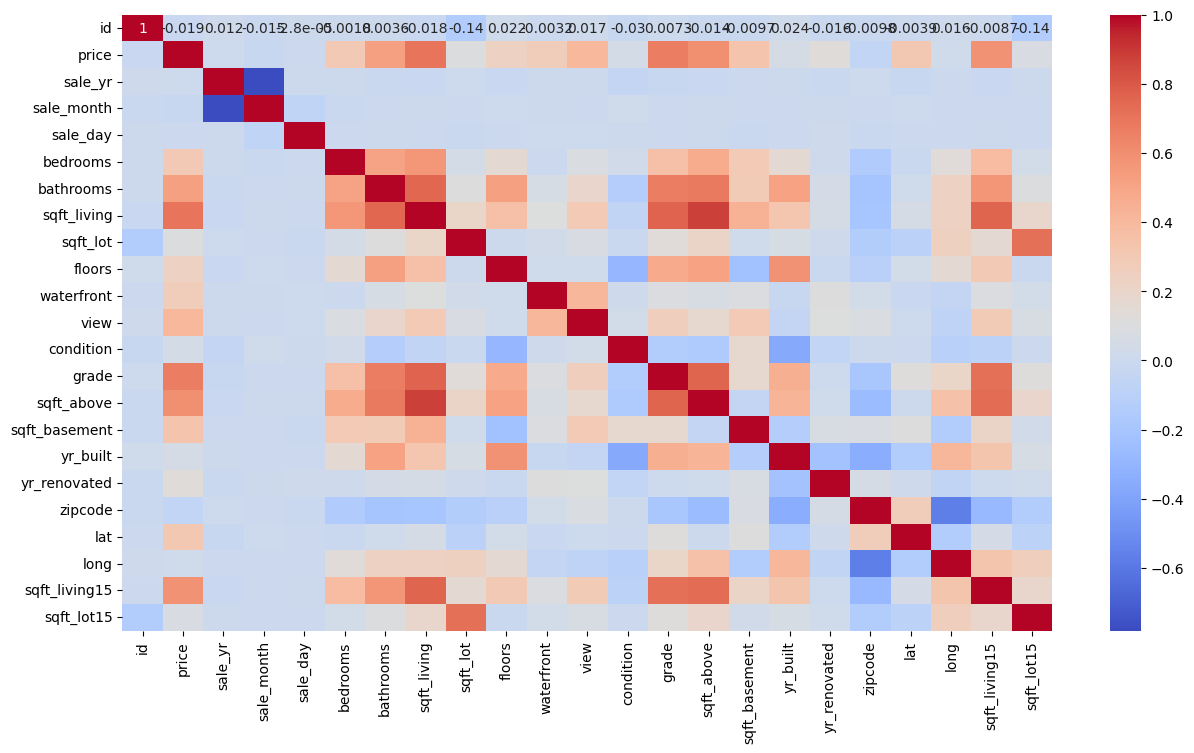

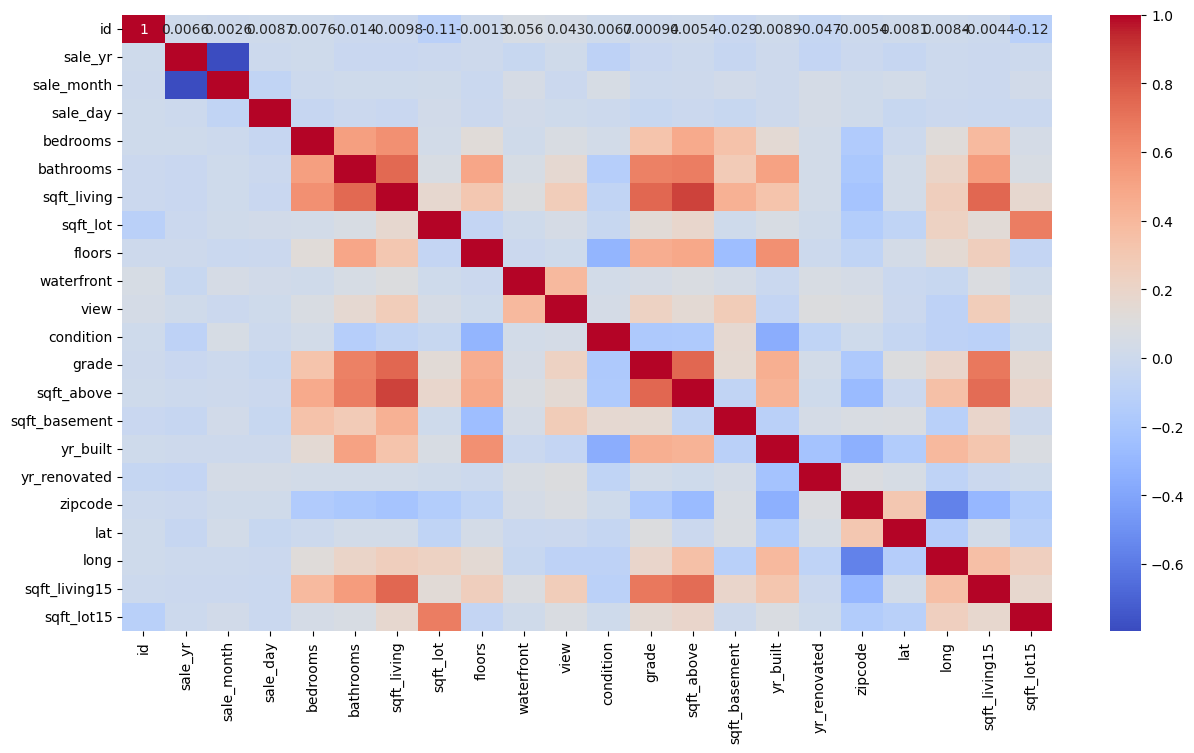

In [111]:
X_train = data.drop('price',axis=1).values #axis=0 表示row, axis=1表示column；先把price的column拿掉
X_train = data.drop('id',axis=1).values #axis=0 表示row, axis=1表示column；先把price的column拿掉
y_train = data['price'].values    # 把price這行數值整個拉出來
print('X_train: ',X_train)
print('Y_train: ',y_train)



plt.figure(figsize=(15,8))
sns.heatmap(data_df.corr(), annot=True, cmap="coolwarm")
plt.show()

X_valid = valid_data.drop('price',axis=1).values #axis=0 表示row, axis=1表示column；先把price的column拿掉
y_valid = valid_data['price'].values  # 把price這行數值整個拉出來

X_valid_df = pd.DataFrame(X_valid, columns=data.drop('price', axis=1).columns) # Convert X_train to a DataFrame, X_train variable is a NumPy ndarray, and ndarrays do not have a direct corr()
plt.figure(figsize=(15,8))
sns.heatmap(X_valid_df.corr(), annot=True, cmap="coolwarm")
plt.show()


# #splitting Train and Test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Feature scaling will help us see all the variables from the same lens (same scale), it will also help our models learn faster.

In [112]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_valid = s_scaler.transform(X_valid.astype(np.float64))

**Training process start!**
assume that there is a linear relationship between a dependent variable Y and independent variables X

In [113]:
#training process
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## 導入多項式套件，建構多項式迴歸模型所需的套件
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize the regressor
#regressor = LinearRegression()
regressor = make_pipeline(PolynomialFeatures(2), LinearRegression())  # the best
#regressor = make_pipeline(PolynomialFeatures(2), Ridge())
#regressor = make_pipeline(PolynomialFeatures(2), Lasso())
#regressor = MyLinearRegression()


# Concatenate the features into a 2D array
#X_train_corr = data[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','sqft_basement','lat','bedrooms','waterfront','floors','yr_renovated','sqft_lot']].values
#X_valid_corr = valid_data[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','sqft_basement','lat','bedrooms','waterfront','floors','yr_renovated','sqft_lot']].values


X_train_corr = data.drop(columns=['price','id','sale_yr','sale_day'])
X_valid_corr = valid_data.drop(columns=['price','id','sale_yr','sale_day'])

# Fit the model
regressor.fit(X_train_corr, y_train)
#regressor.fit(X_valid_try,y_valid)


# #Predict using the trained model
#test_data_corr = test_data[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','sqft_basement','lat','bedrooms','waterfront','floors','yr_renovated','sqft_lot']].values
test_data_corr = test_data.drop(columns=['id','sale_yr','sale_day'])

# y_pred = regressor.predict(test_data_corr)
# print(y_pred)

#test valid data
y_pred = regressor.predict(X_valid_corr)
print(y_pred)



[ 776964.92337799 2237249.09651566  695861.38999939 ...  359408.83428192
  325356.59330368  713797.61528778]


**Using XGBoost for Regression**

learning_rate: The step size shrinkage used to prevent overfitting. A lower learning rate usually results in a more accurate model, but it requires more boosting rounds (iterations).

max_depth: The maximum depth of a tree. A higher value can result in overfitting, so it's important to tune this parameter.

[0]	train-rmse:361369.86450	valid-rmse:337570.14312


[1]	train-rmse:355757.40923	valid-rmse:332383.27502
[2]	train-rmse:350379.79121	valid-rmse:327324.79460
[3]	train-rmse:345193.57525	valid-rmse:322528.26390
[4]	train-rmse:340129.34959	valid-rmse:317815.99393
[5]	train-rmse:335082.73805	valid-rmse:313326.93725
[6]	train-rmse:330223.46213	valid-rmse:308532.11146
[7]	train-rmse:325539.46446	valid-rmse:304108.34454
[8]	train-rmse:320843.82671	valid-rmse:299359.99180
[9]	train-rmse:316262.22943	valid-rmse:295414.10949
[10]	train-rmse:311882.77159	valid-rmse:291541.64292
[11]	train-rmse:307529.81248	valid-rmse:287696.55424
[12]	train-rmse:303257.48710	valid-rmse:283742.16423
[13]	train-rmse:298944.48942	valid-rmse:279887.37552
[14]	train-rmse:294872.08561	valid-rmse:275947.38460
[15]	train-rmse:290914.17901	valid-rmse:272113.52504
[16]	train-rmse:286856.74161	valid-rmse:268523.91729
[17]	train-rmse:282904.89103	valid-rmse:265277.45520
[18]	train-rmse:279117.27460	valid-rmse:261966.44685
[19]	train-rmse:275394.92518	valid-rmse:258722.94736
[2

c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDt

[39]	train-rmse:214765.32568	valid-rmse:204613.58430
[40]	train-rmse:212281.22437	valid-rmse:202309.63614
[41]	train-rmse:209868.16855	valid-rmse:200321.54579
[42]	train-rmse:207501.82681	valid-rmse:198439.27894
[43]	train-rmse:205186.16039	valid-rmse:196443.57124
[44]	train-rmse:202952.86531	valid-rmse:194528.18333
[45]	train-rmse:200681.53562	valid-rmse:192456.01655
[46]	train-rmse:198445.05695	valid-rmse:190646.02617
[47]	train-rmse:196395.38614	valid-rmse:189011.93075
[48]	train-rmse:194360.77358	valid-rmse:187320.64998
[49]	train-rmse:192284.02714	valid-rmse:185381.95087
[50]	train-rmse:190250.42779	valid-rmse:183633.32186
[51]	train-rmse:188239.53390	valid-rmse:182050.32481
[52]	train-rmse:186401.85114	valid-rmse:180355.70595
[53]	train-rmse:184572.90730	valid-rmse:178627.27860
[54]	train-rmse:182765.36009	valid-rmse:177038.14353
[55]	train-rmse:180882.11514	valid-rmse:175384.85791
[56]	train-rmse:179067.44833	valid-rmse:173693.41850
[57]	train-rmse:177475.64692	valid-rmse:172429

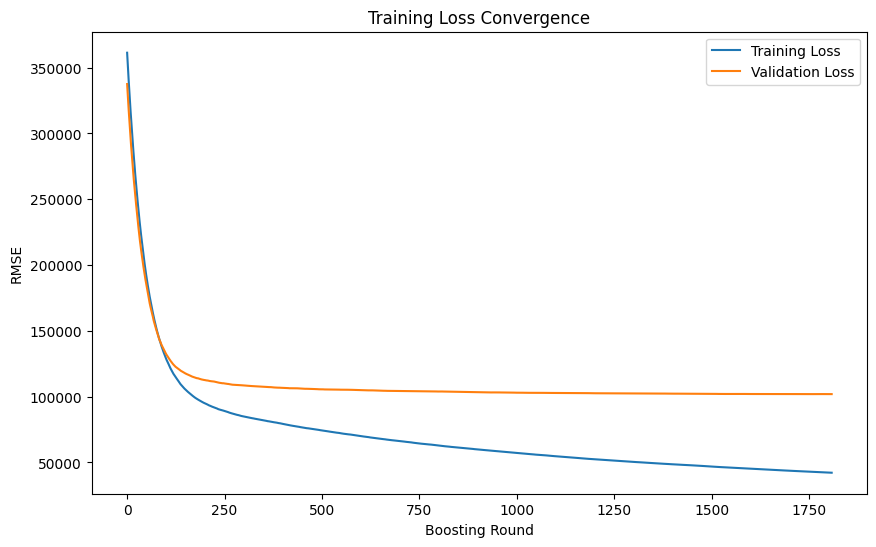

In [114]:
import xgboost as xgb

# Convert data to DMatrix format (required for XGBoost)
dtrain = xgb.DMatrix(X_train_corr, label=y_train)

# Convert validation data to DMatrix format
dvalid = xgb.DMatrix(X_valid_corr, label=y_valid)
dtest = xgb.DMatrix(test_data_corr)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # use RMSE as the evaluation metric
    'learning_rate': 0.02,  # Typical range: [0.01, 0.3]
    'max_depth': 6,  # Typical range: [3, 10]
    'subsample': 0.65,
    'colsample_bytree': 1,
    'alpha': 10,
    'gamma': 10,
    # Add other parameters
}

# Specify the number of boosting rounds (or iterations)
num_round = 5000

# Store evaluation results
eval_results = {}  # Dictionary to store evaluation results

# Train the XGBoost model
model = xgb.train(params,
                  dtrain,
                  num_round,
                  evals=[(dtrain, 'train'), (dvalid, 'valid')],  # Evaluation set
                  evals_result=eval_results,  # Store evaluation results
                  early_stopping_rounds=50,  # Stop early if no improvement for 50 rounds
)

# Plot training loss convergence curve
train_loss = eval_results['train']['rmse']
valid_loss = eval_results['valid']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Training Loss Convergence')
plt.legend()
plt.show()


# Predict using the trained model (dvalid)
y_pred_xgboost = model.predict(dvalid)

#Predict using the trained model (dtest)
#y_pred_xgboost = model.predict(dtest)


This is for adjust parameter automatically (自動調整參數，給定範圍取找出最小的誤差值)

In [115]:
# import optuna
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb

# # Convert data to DMatrix format (required for XGBoost)
# dtrain = xgb.DMatrix(X_train_corr, label=y_train)

# # Convert validation data to DMatrix format
# dvalid = xgb.DMatrix(X_valid_corr, label=y_valid)
# dtest = xgb.DMatrix(test_data_corr)


# def objective(trial):
    
#     #A function to train a model using different hyperparamerters combinations provided by Optuna.

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 6, 6),
#         "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 6000, 100),
#         'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
#         'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
#         'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
#         'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
#     }

#     reg = xgb.XGBRegressor(**params)
#     reg.fit(X_train_corr, 
#             y_train,
#             eval_set=[(X_valid_corr, y_valid)], eval_metric='rmse',
#             verbose=False)
#     return mean_squared_error(y_valid, reg.predict(X_valid_corr), squared=False)

# # Creating Optuna object and defining its parameters
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials = 8)

# # Showing optimization results
# print('Number of finished trials:', len(study.trials))
# print('Best trial parameters:', study.best_trial.params)
# print('Best score:', study.best_value)



Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [116]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df1 = df.head(10)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('Variance Score:',metrics.explained_variance_score(y_valid,y_pred))

# XGBoost method
print('MAE:', metrics.mean_absolute_error(y_valid, y_pred_xgboost))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred_xgboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_xgboost)))
print('Variance Score:',metrics.explained_variance_score(y_valid,y_pred_xgboost))

MAE: 99056.46355536203
MSE: 21614328003.982544
RMSE: 147018.12134557613
Variance Score: 0.8161145292389805
MAE: 59805.77816621356
MSE: 10388861484.145002
RMSE: 101925.76457473842
Variance Score: 0.9116144835940253


In [118]:
with open('prediction.csv', 'w') as f:
    f.write('id,price\n')
    for i in range(len(y_pred_xgboost)):
        f.write('{},{}\n'.format(i+1, y_pred_xgboost[i]))

**Feature Importance Plot (for XGBoost)**

can help understand which features are contributing the most to the predictions, and help in identifying the most influential features in the model.

<Figure size 1000x600 with 0 Axes>

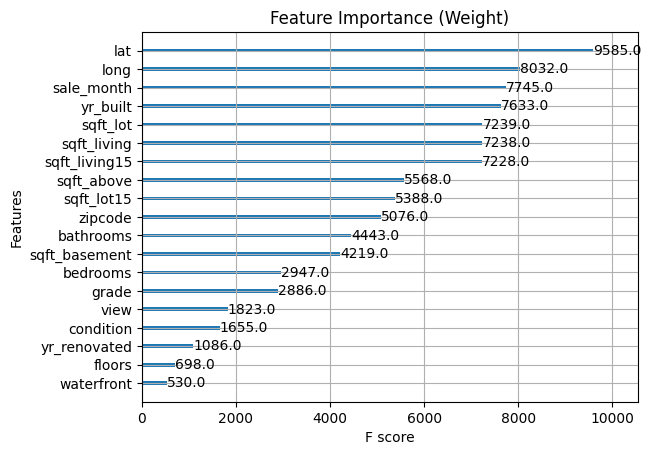

In [119]:
# Feature importance plot for XGBoost
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance (Weight)')
plt.show()

**Actual vs. Predicted Plot**

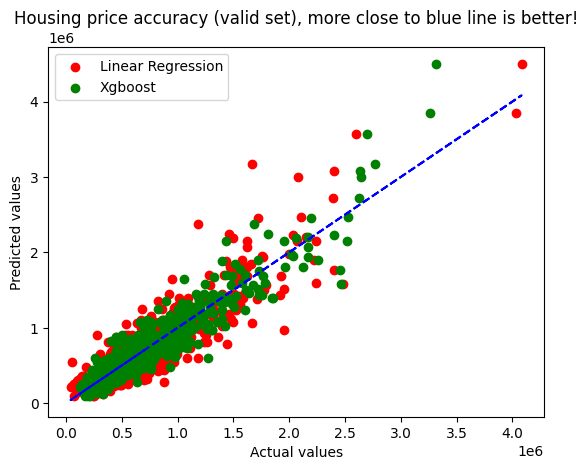

In [120]:
## 視覺化迴歸模型與測試集的關聯 
plt.scatter(y_pred, y_valid, color='red', label='Linear Regression')
plt.scatter(y_pred_xgboost, y_valid, color='green', label='Xgboost')
plt.plot(y_pred, regressor.predict(X_valid_corr), color='blue', linestyle='--')

plt.title('Housing price accuracy (valid set), more close to blue line is better!')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()  # Add legend based on labels
plt.show()

**Distribution of Errors**

This plot helps in understanding if the errors follow a normal distribution or if there are significant deviations.

C:\Users\SUNG YEN TING\AppData\Local\Temp\ipykernel_7504\3063846014.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=25, kde=True)
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SUNG YEN TING\anaconda3\envs\Pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

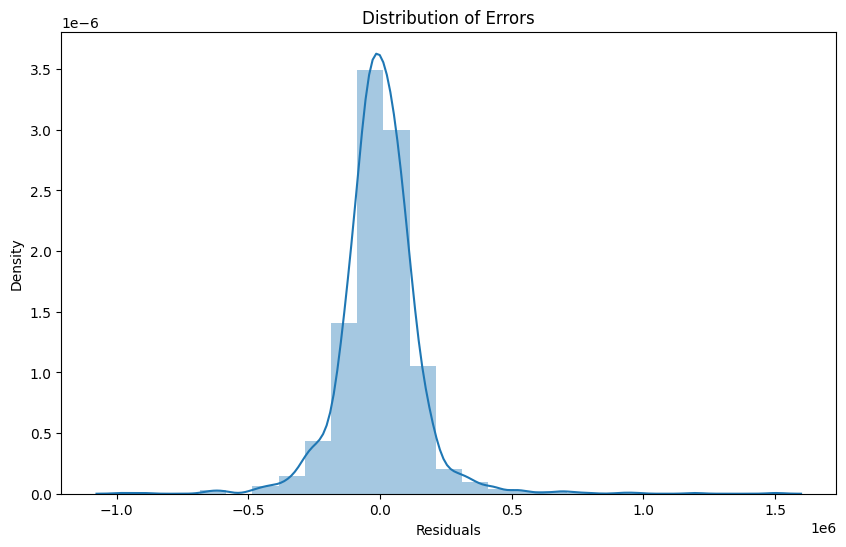

In [121]:
# Distribution of errors

# Calculate residuals
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
sns.distplot(residuals, bins=25, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Errors')
plt.show()

**Residual Plot**

In this plot, we can observe if there's any pattern or trend in the residuals. A random scatter around the zero line is a good indication of a well-performing model.

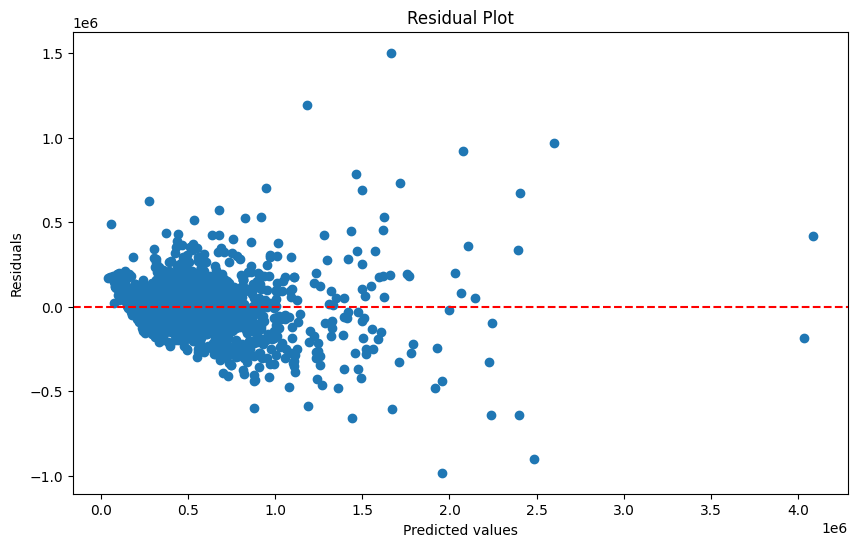

In [122]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()